In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: COP
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


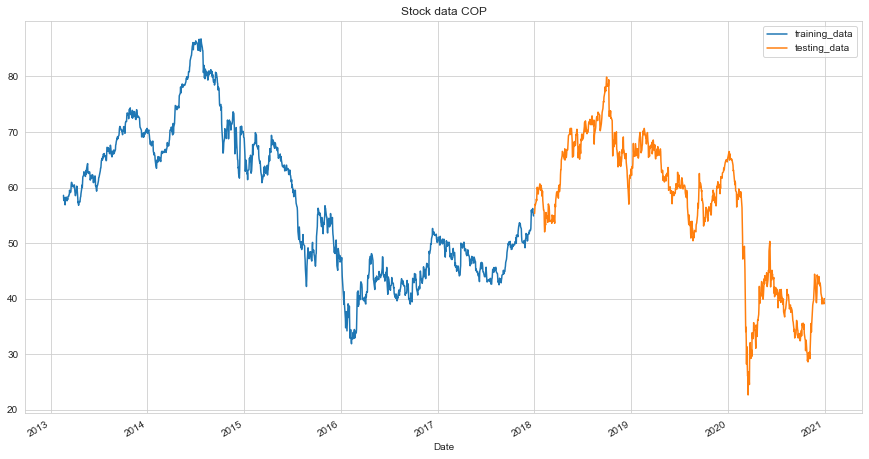

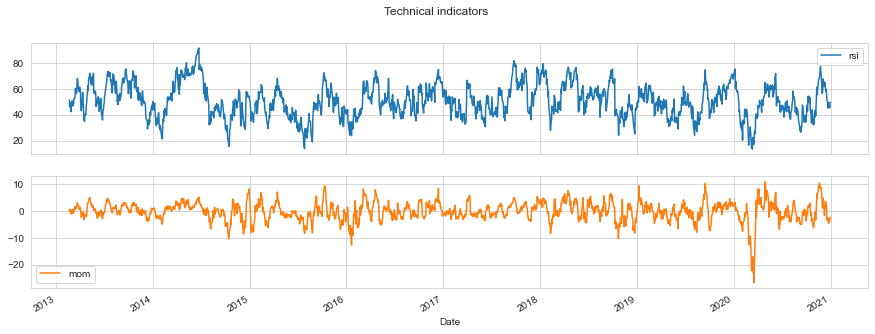

In [10]:
stock_name = 'cop'.upper()
industry = 'Energy'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1138.15, duration: 0:00:00.227054
episode: 2/2000, episode end value: 1076.30, duration: 0:00:00.202047
episode: 3/2000, episode end value: 1121.52, duration: 0:00:00.225050
episode: 4/2000, episode end value: 1110.08, duration: 0:00:00.212047
episode: 5/2000, episode end value: 1130.47, duration: 0:00:00.248059
episode: 6/2000, episode end value: 1110.47, duration: 0:00:00.235050
episode: 7/2000, episode end value: 1122.28, duration: 0:00:00.235053
episode: 8/2000, episode end value: 1121.44, duration: 0:00:00.268061
episode: 9/2000, episode end value: 1110.69, duration: 0:00:00.257057
episode: 10/2000, episode end value: 1114.33, duration: 0:00:00.262059
episode: 11/2000, episode end value: 1112.00, duration: 0:00:00.264060
episode: 12/2000, episode end value: 1110.56, duration: 0:00:00.218048
episode: 13/2000, episode end value: 1087.19, duration: 0:00:00.228051
episode: 14/2000, episode end value: 1056.80, duration: 0:00:00.211048
episode: 15/200

episode: 117/2000, episode end value: 1001.29, duration: 0:00:00.180057
episode: 118/2000, episode end value: 1140.04, duration: 0:00:00.195027
episode: 119/2000, episode end value: 1059.09, duration: 0:00:00.205046
episode: 120/2000, episode end value: 1048.74, duration: 0:00:00.204046
episode: 121/2000, episode end value: 1046.20, duration: 0:00:00.186043
episode: 122/2000, episode end value: 1029.84, duration: 0:00:00.208047
episode: 123/2000, episode end value: 1112.66, duration: 0:00:00.209048
episode: 124/2000, episode end value: 1087.89, duration: 0:00:00.193042
episode: 125/2000, episode end value: 1026.90, duration: 0:00:00.208046
episode: 126/2000, episode end value: 1054.61, duration: 0:00:00.209048
episode: 127/2000, episode end value: 1062.76, duration: 0:00:00.213048
episode: 128/2000, episode end value: 1113.55, duration: 0:00:00.213048
episode: 129/2000, episode end value: 983.81, duration: 0:00:00.207047
episode: 130/2000, episode end value: 1030.16, duration: 0:00:00.

episode: 231/2000, episode end value: 1008.72, duration: 0:00:00.231049
episode: 232/2000, episode end value: 1113.07, duration: 0:00:00.223051
episode: 233/2000, episode end value: 1062.58, duration: 0:00:00.222049
episode: 234/2000, episode end value: 1037.99, duration: 0:00:00.225050
episode: 235/2000, episode end value: 1064.48, duration: 0:00:00.232052
episode: 236/2000, episode end value: 1169.94, duration: 0:00:00.244055
episode: 237/2000, episode end value: 1101.04, duration: 0:00:00.218048
episode: 238/2000, episode end value: 1147.60, duration: 0:00:00.223050
episode: 239/2000, episode end value: 1054.77, duration: 0:00:00.221050
episode: 240/2000, episode end value: 1117.17, duration: 0:00:00.227050
episode: 241/2000, episode end value: 1180.92, duration: 0:00:00.236053
episode: 242/2000, episode end value: 1132.51, duration: 0:00:00.238053
episode: 243/2000, episode end value: 1052.10, duration: 0:00:00.228051
episode: 244/2000, episode end value: 1036.23, duration: 0:00:00

episode: 345/2000, episode end value: 1073.58, duration: 0:00:00.305069
episode: 346/2000, episode end value: 1122.45, duration: 0:00:00.292067
episode: 347/2000, episode end value: 1013.45, duration: 0:00:00.230052
episode: 348/2000, episode end value: 1139.24, duration: 0:00:00.313075
episode: 349/2000, episode end value: 1073.48, duration: 0:00:00.360081
episode: 350/2000, episode end value: 1046.52, duration: 0:00:00.375086
episode: 351/2000, episode end value: 1067.10, duration: 0:00:00.363083
episode: 352/2000, episode end value: 1005.93, duration: 0:00:00.373085
episode: 353/2000, episode end value: 1126.76, duration: 0:00:00.333075
episode: 354/2000, episode end value: 1049.26, duration: 0:00:00.254058
episode: 355/2000, episode end value: 998.16, duration: 0:00:00.275576
episode: 356/2000, episode end value: 1145.34, duration: 0:00:00.279062
episode: 357/2000, episode end value: 1198.44, duration: 0:00:00.260062
episode: 358/2000, episode end value: 1076.22, duration: 0:00:00.

episode: 459/2000, episode end value: 1077.47, duration: 0:00:00.247056
episode: 460/2000, episode end value: 1095.89, duration: 0:00:00.369083
episode: 461/2000, episode end value: 1067.49, duration: 0:00:00.341077
episode: 462/2000, episode end value: 1053.35, duration: 0:00:00.309069
episode: 463/2000, episode end value: 1115.56, duration: 0:00:00.356083
episode: 464/2000, episode end value: 1038.47, duration: 0:00:00.350080
episode: 465/2000, episode end value: 1144.48, duration: 0:00:00.398089
episode: 466/2000, episode end value: 1061.87, duration: 0:00:00.324072
episode: 467/2000, episode end value: 1024.28, duration: 0:00:00.308069
episode: 468/2000, episode end value: 1027.73, duration: 0:00:00.316068
episode: 469/2000, episode end value: 1020.27, duration: 0:00:00.348081
episode: 470/2000, episode end value: 1123.98, duration: 0:00:00.311072
episode: 471/2000, episode end value: 1053.43, duration: 0:00:00.342078
episode: 472/2000, episode end value: 1097.92, duration: 0:00:00

episode: 573/2000, episode end value: 1016.83, duration: 0:00:00.332075
episode: 574/2000, episode end value: 1079.15, duration: 0:00:00.420094
episode: 575/2000, episode end value: 972.56, duration: 0:00:00.399092
episode: 576/2000, episode end value: 1052.13, duration: 0:00:00.409093
episode: 577/2000, episode end value: 1205.79, duration: 0:00:00.437099
episode: 578/2000, episode end value: 981.26, duration: 0:00:00.435098
episode: 579/2000, episode end value: 1038.13, duration: 0:00:00.435098
episode: 580/2000, episode end value: 1090.54, duration: 0:00:00.413092
episode: 581/2000, episode end value: 1099.20, duration: 0:00:00.403088
episode: 582/2000, episode end value: 1072.84, duration: 0:00:00.423095
episode: 583/2000, episode end value: 1042.60, duration: 0:00:00.357080
episode: 584/2000, episode end value: 1019.03, duration: 0:00:00.361083
episode: 585/2000, episode end value: 1088.09, duration: 0:00:00.394089
episode: 586/2000, episode end value: 1055.07, duration: 0:00:00.4

episode: 687/2000, episode end value: 1010.10, duration: 0:00:00.392093
episode: 688/2000, episode end value: 1039.80, duration: 0:00:00.452100
episode: 689/2000, episode end value: 1078.71, duration: 0:00:00.459103
episode: 690/2000, episode end value: 1121.67, duration: 0:00:00.439101
episode: 691/2000, episode end value: 1004.98, duration: 0:00:00.383087
episode: 692/2000, episode end value: 1028.45, duration: 0:00:00.397090
episode: 693/2000, episode end value: 1038.41, duration: 0:00:00.445101
episode: 694/2000, episode end value: 1114.91, duration: 0:00:00.454103
episode: 695/2000, episode end value: 1093.68, duration: 0:00:00.496113
episode: 696/2000, episode end value: 1020.54, duration: 0:00:00.466125
episode: 697/2000, episode end value: 1033.27, duration: 0:00:00.507061
episode: 698/2000, episode end value: 1074.13, duration: 0:00:00.519902
episode: 699/2000, episode end value: 1110.61, duration: 0:00:00.449101
episode: 700/2000, episode end value: 1068.84, duration: 0:00:00

episode: 801/2000, episode end value: 1042.10, duration: 0:00:00.367081
episode: 802/2000, episode end value: 1078.24, duration: 0:00:00.380088
episode: 803/2000, episode end value: 1047.09, duration: 0:00:00.359600
episode: 804/2000, episode end value: 1028.85, duration: 0:00:00.404404
episode: 805/2000, episode end value: 1086.30, duration: 0:00:00.415806
episode: 806/2000, episode end value: 988.88, duration: 0:00:00.431561
episode: 807/2000, episode end value: 1054.08, duration: 0:00:00.401347
episode: 808/2000, episode end value: 1059.32, duration: 0:00:00.425103
episode: 809/2000, episode end value: 1045.69, duration: 0:00:00.448101
episode: 810/2000, episode end value: 1002.06, duration: 0:00:00.386084
episode: 811/2000, episode end value: 1070.12, duration: 0:00:00.332582
episode: 812/2000, episode end value: 1055.96, duration: 0:00:00.432169
episode: 813/2000, episode end value: 1019.43, duration: 0:00:00.403115
episode: 814/2000, episode end value: 1015.04, duration: 0:00:00.

episode: 915/2000, episode end value: 1145.52, duration: 0:00:00.447102
episode: 916/2000, episode end value: 1107.84, duration: 0:00:00.439099
episode: 917/2000, episode end value: 1080.85, duration: 0:00:00.437100
episode: 918/2000, episode end value: 1160.16, duration: 0:00:00.447100
episode: 919/2000, episode end value: 1040.28, duration: 0:00:00.359082
episode: 920/2000, episode end value: 1105.43, duration: 0:00:00.442099
episode: 921/2000, episode end value: 1055.84, duration: 0:00:00.439101
episode: 922/2000, episode end value: 1143.38, duration: 0:00:00.453102
episode: 923/2000, episode end value: 1019.77, duration: 0:00:00.386087
episode: 924/2000, episode end value: 1178.87, duration: 0:00:00.460106
episode: 925/2000, episode end value: 1020.74, duration: 0:00:00.387087
episode: 926/2000, episode end value: 1048.52, duration: 0:00:00.404088
episode: 927/2000, episode end value: 1113.26, duration: 0:00:00.389089
episode: 928/2000, episode end value: 989.32, duration: 0:00:00.

episode: 1029/2000, episode end value: 1048.09, duration: 0:00:00.373084
episode: 1030/2000, episode end value: 1039.27, duration: 0:00:00.410095
episode: 1031/2000, episode end value: 1014.44, duration: 0:00:00.407089
episode: 1032/2000, episode end value: 1050.65, duration: 0:00:00.436099
episode: 1033/2000, episode end value: 1042.66, duration: 0:00:00.440101
episode: 1034/2000, episode end value: 1063.56, duration: 0:00:00.389087
episode: 1035/2000, episode end value: 1053.83, duration: 0:00:00.455102
episode: 1036/2000, episode end value: 1096.96, duration: 0:00:00.490110
episode: 1037/2000, episode end value: 1177.80, duration: 0:00:00.476109
episode: 1038/2000, episode end value: 994.69, duration: 0:00:00.440097
episode: 1039/2000, episode end value: 1105.17, duration: 0:00:00.458104
episode: 1040/2000, episode end value: 1051.19, duration: 0:00:00.399091
episode: 1041/2000, episode end value: 1083.82, duration: 0:00:00.433097
episode: 1042/2000, episode end value: 1065.32, dura

episode: 1142/2000, episode end value: 1099.47, duration: 0:00:00.411094
episode: 1143/2000, episode end value: 1106.73, duration: 0:00:00.420094
episode: 1144/2000, episode end value: 1002.93, duration: 0:00:00.397090
episode: 1145/2000, episode end value: 1145.90, duration: 0:00:00.373083
episode: 1146/2000, episode end value: 1048.66, duration: 0:00:00.342079
episode: 1147/2000, episode end value: 1090.79, duration: 0:00:00.429094
episode: 1148/2000, episode end value: 999.58, duration: 0:00:00.407095
episode: 1149/2000, episode end value: 1077.29, duration: 0:00:00.451100
episode: 1150/2000, episode end value: 1014.34, duration: 0:00:00.378085
episode: 1151/2000, episode end value: 1090.34, duration: 0:00:00.389089
episode: 1152/2000, episode end value: 1068.84, duration: 0:00:00.419095
episode: 1153/2000, episode end value: 1067.83, duration: 0:00:00.432098
episode: 1154/2000, episode end value: 1009.04, duration: 0:00:00.477110
episode: 1155/2000, episode end value: 1015.60, dura

episode: 1255/2000, episode end value: 1094.40, duration: 0:00:00.390090
episode: 1256/2000, episode end value: 1016.98, duration: 0:00:00.429096
episode: 1257/2000, episode end value: 1021.45, duration: 0:00:00.485109
episode: 1258/2000, episode end value: 1006.90, duration: 0:00:00.424095
episode: 1259/2000, episode end value: 1010.32, duration: 0:00:00.386087
episode: 1260/2000, episode end value: 1059.63, duration: 0:00:00.405093
episode: 1261/2000, episode end value: 1103.85, duration: 0:00:00.428609
episode: 1262/2000, episode end value: 1115.25, duration: 0:00:00.477051
episode: 1263/2000, episode end value: 1121.44, duration: 0:00:00.452658
episode: 1264/2000, episode end value: 1095.93, duration: 0:00:00.422095
episode: 1265/2000, episode end value: 1078.93, duration: 0:00:00.440106
episode: 1266/2000, episode end value: 1067.14, duration: 0:00:00.360080
episode: 1267/2000, episode end value: 1073.34, duration: 0:00:00.475108
episode: 1268/2000, episode end value: 1038.05, dur

episode: 1368/2000, episode end value: 1040.41, duration: 0:00:00.394090
episode: 1369/2000, episode end value: 1105.87, duration: 0:00:00.413094
episode: 1370/2000, episode end value: 1014.64, duration: 0:00:00.390087
episode: 1371/2000, episode end value: 1016.49, duration: 0:00:00.433097
episode: 1372/2000, episode end value: 1022.95, duration: 0:00:00.445100
episode: 1373/2000, episode end value: 1049.88, duration: 0:00:00.439098
episode: 1374/2000, episode end value: 1109.21, duration: 0:00:00.404096
episode: 1375/2000, episode end value: 1175.36, duration: 0:00:00.394088
episode: 1376/2000, episode end value: 1054.19, duration: 0:00:00.359634
episode: 1377/2000, episode end value: 1015.71, duration: 0:00:00.393279
episode: 1378/2000, episode end value: 1147.26, duration: 0:00:00.407755
episode: 1379/2000, episode end value: 998.16, duration: 0:00:00.372086
episode: 1380/2000, episode end value: 1115.85, duration: 0:00:00.453101
episode: 1381/2000, episode end value: 1126.04, dura

episode: 1481/2000, episode end value: 1023.97, duration: 0:00:00.389087
episode: 1482/2000, episode end value: 1071.80, duration: 0:00:00.381086
episode: 1483/2000, episode end value: 1087.46, duration: 0:00:00.423095
episode: 1484/2000, episode end value: 1029.89, duration: 0:00:00.415092
episode: 1485/2000, episode end value: 1073.28, duration: 0:00:00.375085
episode: 1486/2000, episode end value: 1130.05, duration: 0:00:00.429096
episode: 1487/2000, episode end value: 1029.78, duration: 0:00:00.353080
episode: 1488/2000, episode end value: 1033.34, duration: 0:00:00.422094
episode: 1489/2000, episode end value: 1060.18, duration: 0:00:00.430099
episode: 1490/2000, episode end value: 1109.96, duration: 0:00:00.419093
episode: 1491/2000, episode end value: 1040.98, duration: 0:00:00.421098
episode: 1492/2000, episode end value: 980.57, duration: 0:00:00.401093
episode: 1493/2000, episode end value: 1053.80, duration: 0:00:00.431098
episode: 1494/2000, episode end value: 1126.77, dura

episode: 1594/2000, episode end value: 1094.99, duration: 0:00:00.438099
episode: 1595/2000, episode end value: 1047.44, duration: 0:00:00.379080
episode: 1596/2000, episode end value: 1157.90, duration: 0:00:00.402090
episode: 1597/2000, episode end value: 1077.72, duration: 0:00:00.354098
episode: 1598/2000, episode end value: 1130.82, duration: 0:00:00.409092
episode: 1599/2000, episode end value: 1048.40, duration: 0:00:00.425095
episode: 1600/2000, episode end value: 1082.14, duration: 0:00:00.404094
episode: 1601/2000, episode end value: 1082.83, duration: 0:00:00.451102
episode: 1602/2000, episode end value: 1183.26, duration: 0:00:00.436101
episode: 1603/2000, episode end value: 1094.75, duration: 0:00:00.388088
episode: 1604/2000, episode end value: 1115.14, duration: 0:00:00.397089
episode: 1605/2000, episode end value: 1049.30, duration: 0:00:00.385088
episode: 1606/2000, episode end value: 1005.35, duration: 0:00:00.342077
episode: 1607/2000, episode end value: 1069.26, dur

episode: 1707/2000, episode end value: 1065.52, duration: 0:00:00.364081
episode: 1708/2000, episode end value: 1051.18, duration: 0:00:00.434761
episode: 1709/2000, episode end value: 1097.90, duration: 0:00:00.422095
episode: 1710/2000, episode end value: 1045.56, duration: 0:00:00.401091
episode: 1711/2000, episode end value: 1063.41, duration: 0:00:00.432601
episode: 1712/2000, episode end value: 1142.42, duration: 0:00:00.426102
episode: 1713/2000, episode end value: 1071.61, duration: 0:00:00.347078
episode: 1714/2000, episode end value: 1019.60, duration: 0:00:00.365083
episode: 1715/2000, episode end value: 1070.05, duration: 0:00:00.364081
episode: 1716/2000, episode end value: 1177.68, duration: 0:00:00.431100
episode: 1717/2000, episode end value: 1106.57, duration: 0:00:00.365081
episode: 1718/2000, episode end value: 1192.86, duration: 0:00:00.423101
episode: 1719/2000, episode end value: 1034.10, duration: 0:00:00.322461
episode: 1720/2000, episode end value: 1061.13, dur

episode: 1820/2000, episode end value: 995.60, duration: 0:00:00.352078
episode: 1821/2000, episode end value: 1011.04, duration: 0:00:00.404090
episode: 1822/2000, episode end value: 1096.97, duration: 0:00:00.427096
episode: 1823/2000, episode end value: 1056.71, duration: 0:00:00.434099
episode: 1824/2000, episode end value: 999.46, duration: 0:00:00.385085
episode: 1825/2000, episode end value: 1177.18, duration: 0:00:00.418681
episode: 1826/2000, episode end value: 1015.71, duration: 0:00:00.404089
episode: 1827/2000, episode end value: 1008.80, duration: 0:00:00.383086
episode: 1828/2000, episode end value: 1103.40, duration: 0:00:00.376086
episode: 1829/2000, episode end value: 1092.64, duration: 0:00:00.404627
episode: 1830/2000, episode end value: 1016.46, duration: 0:00:00.431111
episode: 1831/2000, episode end value: 1079.78, duration: 0:00:00.472284
episode: 1832/2000, episode end value: 1078.74, duration: 0:00:00.433103
episode: 1833/2000, episode end value: 1207.78, durat

episode: 1933/2000, episode end value: 1029.98, duration: 0:00:00.299069
episode: 1934/2000, episode end value: 1103.89, duration: 0:00:00.364082
episode: 1935/2000, episode end value: 1097.84, duration: 0:00:00.331075
episode: 1936/2000, episode end value: 1037.24, duration: 0:00:00.322072
episode: 1937/2000, episode end value: 1113.21, duration: 0:00:00.323077
episode: 1938/2000, episode end value: 1092.27, duration: 0:00:00.347074
episode: 1939/2000, episode end value: 1034.14, duration: 0:00:00.374085
episode: 1940/2000, episode end value: 1103.83, duration: 0:00:00.337076
episode: 1941/2000, episode end value: 1109.49, duration: 0:00:00.310069
episode: 1942/2000, episode end value: 1020.76, duration: 0:00:00.297072
episode: 1943/2000, episode end value: 1063.67, duration: 0:00:00.310071
episode: 1944/2000, episode end value: 1042.27, duration: 0:00:00.326075
episode: 1945/2000, episode end value: 1055.25, duration: 0:00:00.285064
episode: 1946/2000, episode end value: 1039.63, dur

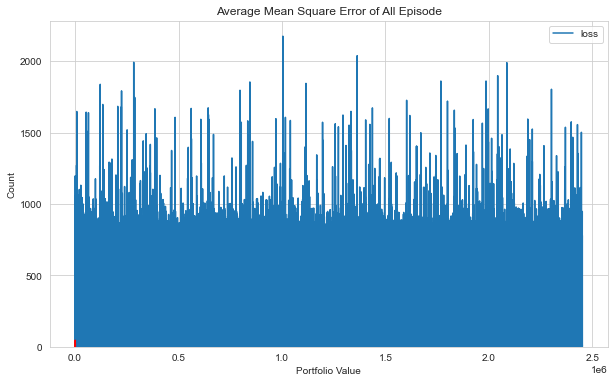

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

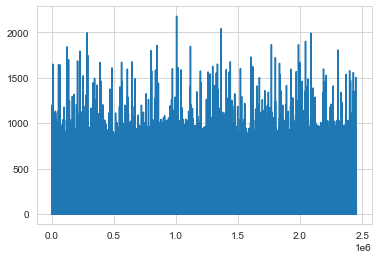

In [5]:
plt.plot(agent.model.losses)

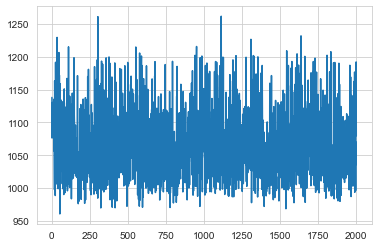

In [6]:
plt.plot(portfolio_value)

episode end value: 996.53, duration: 0:00:00.092020
Sell: 107 times, Buy: 118 times


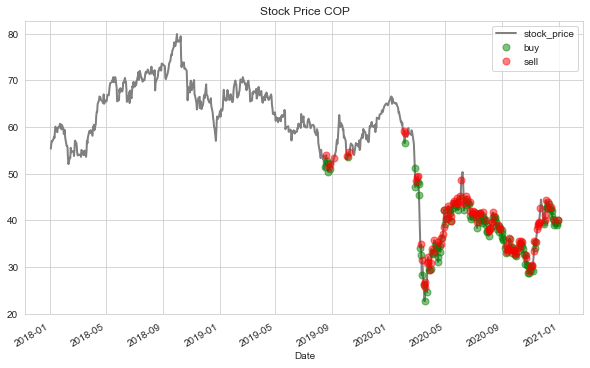

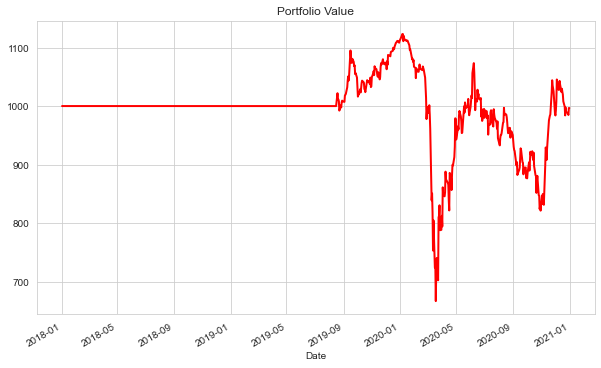

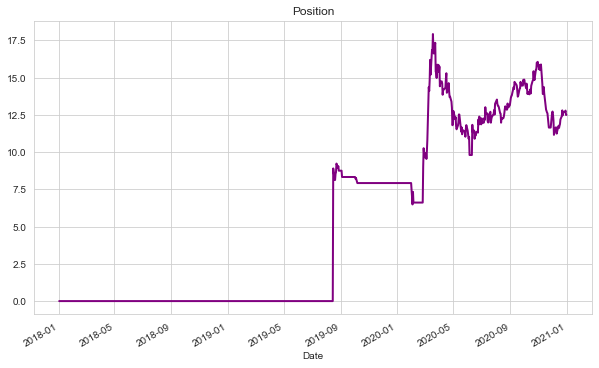

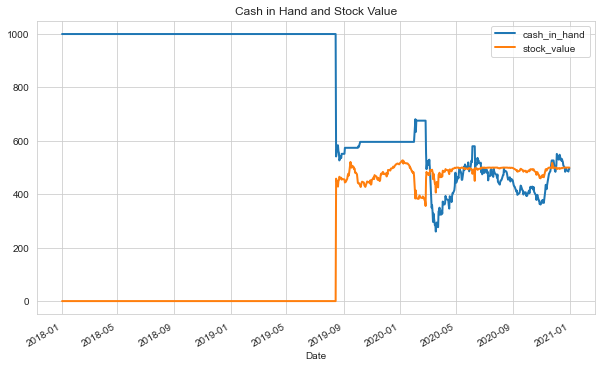

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: COP
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -0.12 %
Volatility: 0.2364
shape ratio: -0.0514
Maximun drawdown: -40.62 %
Calmar ratio: -0.0028
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -10.25 %
Volatility (benchmark): 0.4810
shape ratio: -0.2360
Maximun drawdown: -71.62 %
Calmar ratio (benchmark): -0.1431


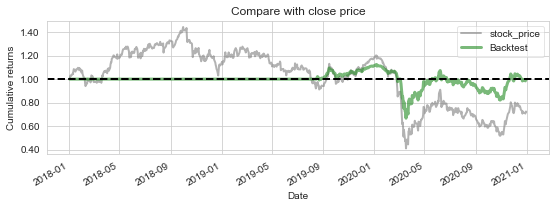

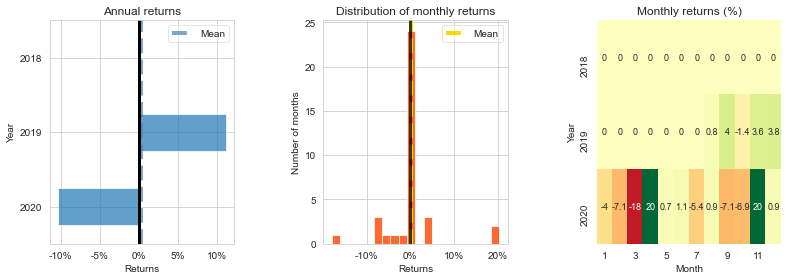

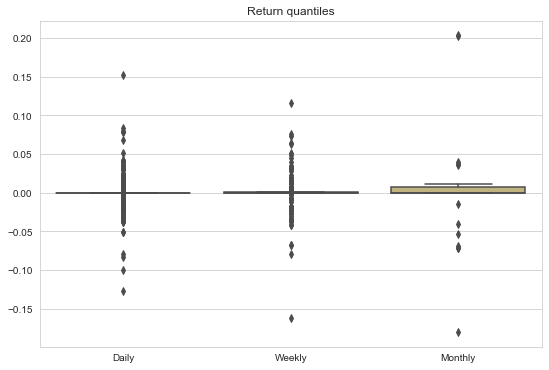

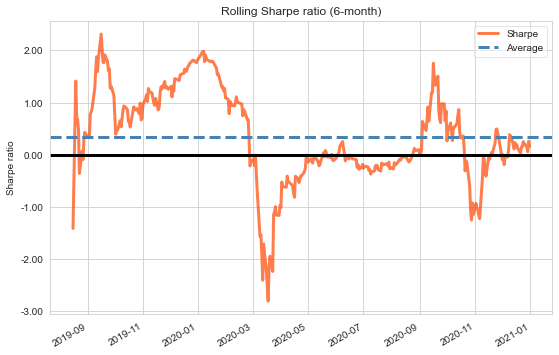

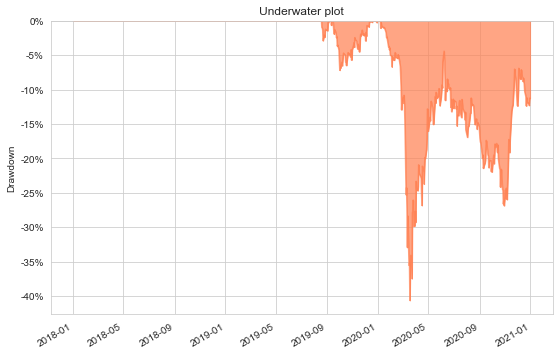

In [11]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')